In [1]:
from keras.models import load_model
from keras.callbacks import History 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('UNRATE.csv')
# split data into training and testing sets
training_set = df.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
regressor = load_model('model_best_current.h5')

In [5]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [6]:
dataset_total = df.iloc[:, 1:2].values

In [7]:
timestemp = 36
prediction_month = 36

In [8]:
result = []
for i in range(0, prediction_month):
    X_test = []
    inputs = dataset_total[len(dataset_total) - timestemp:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test.append(inputs[0:timestemp, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted = regressor.predict(X_test)
    predicted = sc.inverse_transform(predicted)
    result.append(predicted[0][0])
    dataset_total = np.append(dataset_total, predicted[0][0])
    

In [9]:
print(result)

[3.7487001, 3.9141512, 4.1333914, 4.3731937, 4.5643477, 4.7390966, 4.9274735, 5.167933, 5.499846, 5.9226294, 6.4252496, 6.9878993, 7.592629, 8.21361, 8.78654, 9.219392, 9.438535, 9.441088, 9.285927, 9.052022, 8.790023, 8.515101, 8.232838, 7.9590244, 7.715884, 7.52276, 7.3919554, 7.3291264, 7.3328176, 7.3927884, 7.488735, 7.591918, 7.671603, 7.7070365, 7.6966124, 7.6582828]


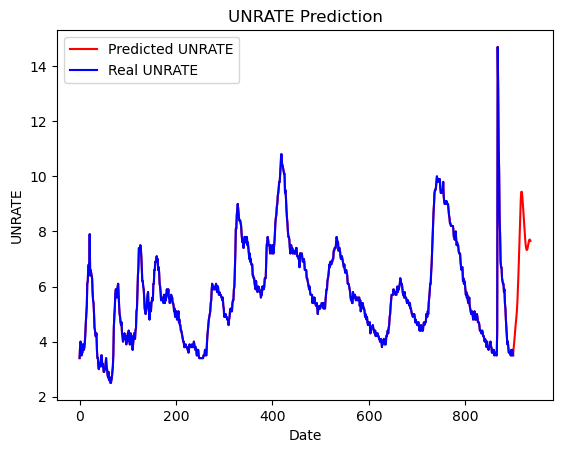

In [10]:
plt.plot(dataset_total, color = 'red', label = 'Predicted UNRATE')
plt.plot(training_set, color = 'blue', label = 'Real UNRATE')
plt.title('UNRATE Prediction')
plt.xlabel('Date')
plt.ylabel('UNRATE')
plt.legend()
plt.show()

In [11]:
result = pd.DataFrame({'UNRATE': result})
result.to_csv('result.csv', index=False)